## Q.1. & Q.2.

In [40]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

titanic_data = pd.read_csv('titanic.csv')

# Q.3.

## Univariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

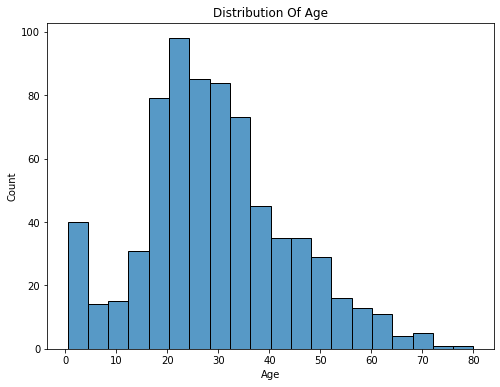

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(data=titanic_data, x='age', bins=20)
plt.title('Distribution Of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show

## Bivariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

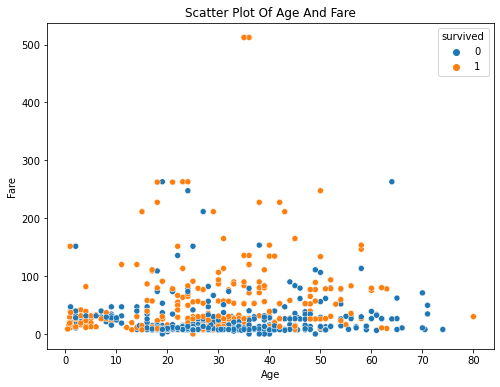

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=titanic_data, x='age', y='fare', hue='survived')
plt.title('Scatter Plot Of Age And Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show

## Multivariable Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

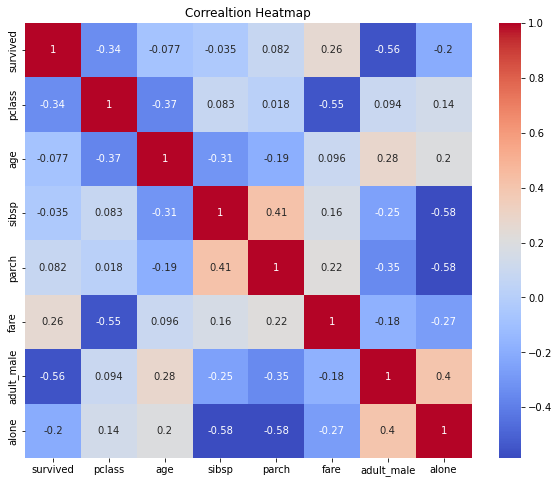

In [9]:
plt.figure(figsize=(10, 8))
correlation_matrix = titanic_data.corr()
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm')
plt.title('Correaltion Heatmap')
plt.show

## Q.4.

In [11]:
descriptive_stats = titanic_data.describe()
print(descriptive_stats)

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


# Q.5.
## 1. Drop Rows With Missing Values

In [12]:
print(titanic_data.isnull().sum())
titanic_data_dropped = titanic_data.dropna()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


## Fill Missing Values With A Specific Value


In [13]:
titanic_data_filled = titanic_data.fillnana(0)

## Fill Missing Values The Mean Of The Column 

In [14]:
titanic_data_mean_filled = titanic_data.fillna(titanic_data.mean())

C:\Users\sabdu\AppData\Local\Temp/ipykernel_13844/333858766.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  titanic_data_mean_filled = titanic_data.fillna(titanic_data.mean())


In [15]:
print(titanic_data_dropped.head())
print(titanic_data_filled.head())
print(titanic_data_mean_filled.head())

    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
1          1       1  female  38.0      1      0  71.2833        C  First   
3          1       1  female  35.0      1      0  53.1000        S  First   
6          0       1    male  54.0      0      0  51.8625        S  First   
10         1       3  female   4.0      1      1  16.7000        S  Third   
11         1       1  female  58.0      0      0  26.5500        S  First   

      who  adult_male deck  embark_town alive  alone  
1   woman       False    C    Cherbourg   yes  False  
3   woman       False    C  Southampton   yes  False  
6     man        True    E  Southampton    no   True  
10  child       False    G  Southampton   yes  False  
11  woman       False    C  Southampton   yes   True  
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.283

## Q.6.

In [20]:
column='fare'
q1 = titanic_data[column].quantile(0.25)
q3 = titanic_data[column].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outlier_indices = titanic_data[(titanic_data[column] < lower_bound) | (titanic_data[column] > upper_bound)].index

titanic_data.loc[outlier_indices, column] = titanic_data[column].median()

print(titanic_data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  14.4542        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  14.4542        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


## Q.7.

In [24]:
categorical_columns = titanic_data.select_dtypes(include=['object']).columns

one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = pd.DataFrame(one_hot_encoder.fit_transform(titanic_data[categorical_columns]))

titanic_data = pd.concat([titanic_data.drop(categorical_columns, axis=1), encoded_features], axis=1)

print(titanic_data.head())

   survived  pclass   age  sibsp  parch     fare  adult_male  alone    0    1  \
0         0       3  22.0      1      0   7.2500        True  False  1.0  0.0   
1         1       1  38.0      1      0  71.2833       False  False  0.0  0.0   
2         1       3  26.0      0      0   7.9250       False   True  0.0  0.0   
3         1       1  35.0      1      0  53.1000       False  False  0.0  0.0   
4         0       3  35.0      0      0   8.0500        True   True  1.0  0.0   

   ...    9   10   11   12   13   14   15   16   17   18  
0  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  
1  ...  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
2  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  
3  ...  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  
4  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  

[5 rows x 27 columns]


## Q.8.

In [28]:
X = titanic_data.drop('survived', axis=1)
y = titanic_data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (712, 14)
X_test shape: (179, 14)
y_train shape: (712,)
y_test shape: (179,)


## Q.9. 

In [37]:
X = titanic_data.drop('sex', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
print(X_scaled_df.head())

ValueError: could not convert string to float: 'S'

## Q.10.

In [38]:
X = titanic_data.drop('survived', axis=1)
y = titanic_data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (712, 14)
X_test shape: (179, 14)
y_train shape: (712,)
y_test shape: (179,)
